# Segmenting a Jet Image

Image segmentation involves the seperation of an image into distinct components. In the case of liquid jets from a GDVN, these regions could be the nozzle tip, continuous jet, and the droplet region. This document provides some use cases for segmenting liquid jets using the `microjet_analysis.segment` module. Note that while these methods work on any type of image stack, they do have some underlying assumptions, these assumptions are discussed below. Also note that the methods presented here work best on "processed" data (i.e., binary, cleaned up) datasets. 

In [1]:
import numpy as np
import pylab as plt
from microjet import filters, regions, process, dataio

In [2]:
# Load the example data
stack, metadata = dataio.example_data(example="binary")

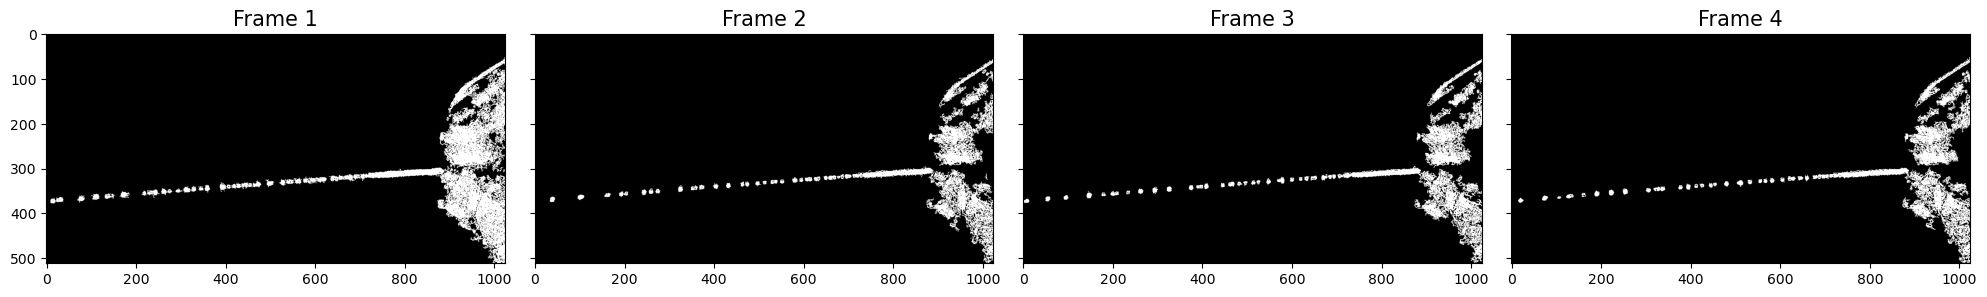

In [3]:
# Display the first n frames to visualize the dataset
fig, ax = plt.subplots(1,4, figsize=(20,10), sharey=True, tight_layout=True)
for i in range(4):
    ax[i].imshow(stack[i].T, cmap="gray", vmin=0, vmax=1)
    ax[i].set_title(f"Frame {i+1}", fontsize=15)
plt.show()

## Locating and Removing the Nozzle Tip

In most cases, the nozzle tip is in view of the camera. To analyze the jet dynamics properly, it is useful to remove and ignore parts of the image where the nozzle tip is in view. Three methods are provided to do this.

1. `regions.find_nozzle_tip_by_intensity()` provides a single index position for the nozzle tip across each frame
2. `regions.nozzle_tip_shotbyshot()` determines the nozzle tip index position on a frame-by-frame basis
3. `regions.find_nozzle_tip_simple()` determines the nozzle tip index position on a frame-by-frame basis
4. `regions.remove_nozzle_tip()` crops the image according to a predetermined nozzle tip position
    



In [4]:
# Calculate the nozzle tip index position using each available method
ntip_intensity = regions.find_nozzle_tip_by_intensity(stack[1])
ntip_column = regions.find_nozzle_tip_by_column(stack[1])
ntip_simple = regions.find_nozzle_tip_simple(stack[1])
ntip_intensity, ntip_column, ntip_simple

(1007, 1021, 899)

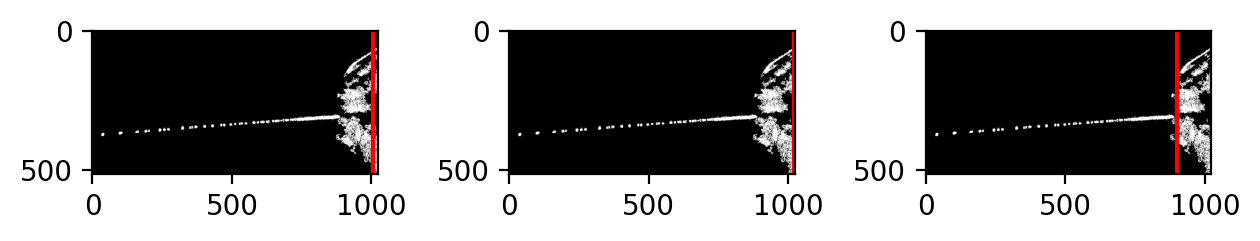

In [17]:
fig, ax = plt.subplots(1,3, tight_layout=True, dpi=200)
ax[0].imshow(stack[1].T, cmap="gray", vmin=0, vmax=1)
ax[0].vlines(ntip_intensity, 0, 511, 'r')

ax[1].imshow(stack[1].T, cmap="gray", vmin=0, vmax=1)
ax[1].vlines(ntip_column, 0, 511, 'r')

ax[2].imshow(stack[1].T, cmap="gray", vmin=0, vmax=1)
ax[2].vlines(ntip_simple, 0, 511, 'r')

Each nozzle tip find method works better under different conditions, but in this case, the simple method seems to work the best. Alternatively, a manual index position can be determined in pixel units and propagated to the cropping method in the subsequent cells. Going forward with the example, we'll use the automatically determined index position from the `regions.find_nozzle_tip_simple` method. 

In [19]:
# Find the nozzle tip for each individual shot
ntips_idx = np.array([regions.find_nozzle_tip_simple(im) for im in stack])
print("Stack length: ", len(stack), "\t ntip_idx length: ", len(ntips_idx))

# Crop the image accordingly and remove the nozzle tip
cropped_stack = regions.remove_nozzle_tip(stack, ntips_idx)
print("Shape of cropped stack: ", np.shape(cropped_stack))

Stack length:  20 	 ntip_idx length:  20
Shape of cropped stack:  (20, 899, 512)


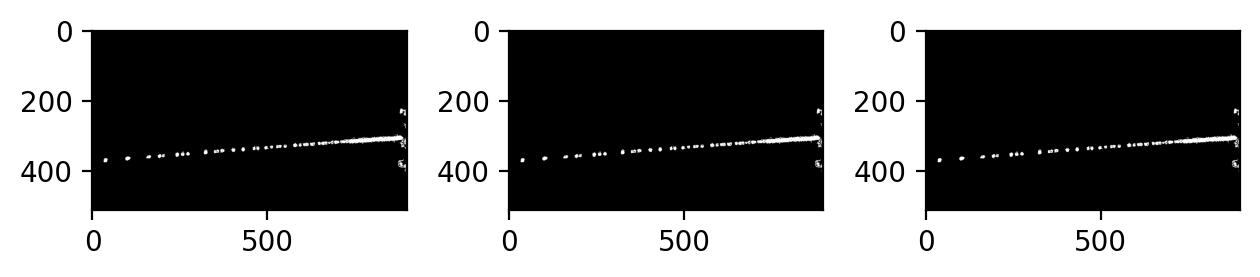

In [20]:
fig, ax = plt.subplots(1,3, tight_layout=True, dpi=200)
ax[0].imshow(cropped_stack[1].T, cmap="gray", vmin=0, vmax=1)
ax[1].imshow(cropped_stack[1].T, cmap="gray", vmin=0, vmax=1)
ax[2].imshow(cropped_stack[1].T, cmap="gray", vmin=0, vmax=1)

## Segmenting the Droplets and Determining Jet Length